# Fetch the cryptocurrency off-chain data via the CryptoCompare API

- Author: Yichen Luo
- Date: 2024-09-30

## Dependencies
- Install the `requests`, `pandas`, and `matplotlib` libraries using the following command:
```bash
pip install --upgrade pip
pip install requests pandas matplotlib
```

In [3]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import requests

## Open, High, Low, Close, and Volume (OHLCV) data

### What is OHLCV data
OHLCV is an aggregated form of market data standing for Open, High, Low, Close and Volume. OHLCV data includes 5 data points: the Open and Close represent the first and the last price level during a specified interval. High and Low represent the highest and lowest reached price during that interval. Volume is the total amount traded during that period. This data is most frequently represented in a candlestick chart, which allows traders to perform technical analysis on intraday values. We provide OHLCV data with daily granularity.

### Why we need to fetch OHLCV data
- Quantitative trading: OHLCV data is the most basic and widely used data for quantitative trading. It is used to create trading strategies, backtesting, and risk management.
- Research: OHLCV data is used for research purposes such as empirical asset pricing, scam detection, and market efficiency.
- Technical analysis: OHLCV data is used to create candlestick charts, which are used to identify patterns and trends in the market.


<img src="./fig/candlestick.ppm" width="800">

## CryptoCompare 

### What is CryptoCompare
CryptoCompare (https://www.cryptocompare.com/) is a leading plaform in digital asset market data, providing services that cater to corporate, government and retail clients.

### How to fetch OHLCV data from CryptoCompare
CryptoCompare provides a free API that allows users to fetch OHLCV data for cryptocurrencies. The API provides historical data for cryptocurrencies, including daily open, high, low, close, and volume. The API is free to use, but users need to sign up for an account to get an API key.

<img src="./fig/api.png" width="500">

#### Step 1: Sign up for a free account and get the API key
- Go to the CryptoCompare API documentation (https://developers.cryptocompare.com/documentation/legacy/Historical/dataHistoday)
- Click the "Free Key" button to sign up for a free account

<img src="./fig/api_key.png" width="1200">

- Click the "Manage" button to enter the API key management page

<img src="./fig/manage_key.png" width="1200">

- Add a new key by clicking the "Add New API Key" button

<img src="./fig/add_key.png" width="1200">

- Create a new key by entering a name, ticking the policy agreement, and clicking the "Add API Key" button

<img src="./fig/create_key.png" width="1200">

- Copy the API key and save it in a secure place

<img src="./fig/copy_key.png" width="1200">

#### Step 2: Fetch OHLCV data using the API

- We need to understand the API endpoint and parameters to fetch the data.

<img src="./fig/fill_params.png" width="1200">

- What do these parameters mean?

    - fsym: The cryptocurrency symbol of interest (e.g., BTC, ETH, XRP)
    - tsym: The currency symbol to convert into (e.g., USD, EUR, GBP)
    - limit: The number of data points to return (e.g. 1000)
    - allData: Returns all data (only available on histo day) (e.g. true)
    - api_key: The API key obtained from the CryptoCompare website

<img src="./fig/params_meaning.png" width="1200">

- Have a try on the playground
  
<img src="./fig/playground.png" width="1200">

#### Step 3: Migrate the code to the local environment
- Once we finish the minimum working example in the playground, we could migrate the code to our local environment. 
- We need to tell the remote server which data we want to fetch by specifying the parameters in the URL.

<img src="./fig/url.png" width="1200">

- Then we can use the `requests` library to fetch the data from the CryptoCompare API.
- We can define a function to fetch the daily OHLCV data of a cryptocurrency pair.

In [2]:
BASEURL = "https://min-api.cryptocompare.com/data/v2/histoday?"
API_KEY = "YOUR_API_KEY"

def get_daily_pair_ohlcv(fsym: str, tsym: str = "USD", limit: int = 2000) -> dict:
    """
    Function to fetch daily OHLCV data of a cryptocurrency pair from cryptocompare API

    Args:
        fsym (str): The symbol of the cryptocurrency to retrieve data for (e.g., 'BTC' for Bitcoin).
        tsym (str, optional): The symbol of the currency to compare against (default is 'USD').
        limit (int, optional): The maximum number of data points to retrieve (default is 2000).
    
    Returns:
        dict: A dictionary containing the OHLCV data fetched from the CryptoCompare API. The 
              structure of the dictionary follows the CryptoCompare API's response format.
    """

    # construct the url
    url = f"{BASEURL}fsym={fsym}&tsym={tsym}&limit={limit}&allData=true&api_key={API_KEY}"

    # return the json response
    return requests.get(url, timeout=60).json()

In [6]:
# get the price history of BTC
btc_json = get_daily_pair_ohlcv(fsym="BTC")

# save the json to a file
with open(
    "btc.json",
    "w",
    encoding="utf-8",
) as f:
    json.dump(btc_json, f)

# convert the json to a pandas dataframe
btc_df = pd.DataFrame(btc_json["Data"]["Data"])

# convert the time to a datetime object
btc_df["time"] = pd.to_datetime(btc_df["time"], unit="s")

btc_df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2010-07-17,0.04951,0.04951,0.04951,20.00,9.902000e-01,0.04951,direct,
1,2010-07-18,0.08585,0.04951,0.04951,75.01,5.092000e+00,0.08584,direct,
2,2010-07-19,0.09307,0.07723,0.08584,574.00,4.966000e+01,0.08080,direct,
3,2010-07-20,0.08181,0.07426,0.08080,262.00,2.059000e+01,0.07474,direct,
4,2010-07-21,0.07921,0.06634,0.07474,575.00,4.226000e+01,0.07921,direct,
...,...,...,...,...,...,...,...,...,...
5186,2024-09-27,66547.69000,64839.11000,65183.68000,36162.60,2.378878e+09,65790.28000,direct,
5187,2024-09-28,66267.41000,65442.19000,65790.28000,10383.49,6.827653e+08,65868.67000,direct,
5188,2024-09-29,66081.97000,65440.30000,65868.67000,11532.92,7.583221e+08,65611.98000,direct,
5189,2024-09-30,65627.43000,62846.03000,65611.98000,42396.01,2.712227e+09,63314.81000,direct,


- Next, we could convert the data into a pandas DataFrame for further analysis.
- Finally, we can visualize the data using the `matplotlib` library to compare with the candlestick chart from the CryptoCompare website.

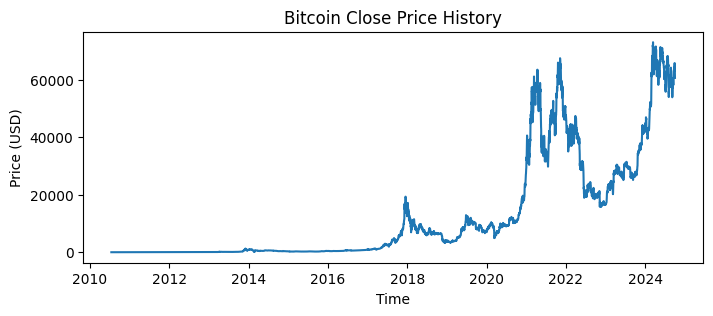

In [7]:
# visualize the close price
plt.figure(figsize=(8, 3))
plt.plot(btc_df["time"], btc_df["close"])
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Close Price History")
plt.show()

<img src="./fig/btc_cc.png" width="1200">